# Plots from Renee trial data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pk

In [2]:
file_name = 'C:\\Users\\nuttida-lab\\Documents\\renee\\WMInstructionTask\\patientData\\taskLogs\\renee_Sub_11-28-2025_13-58-39.pkl'

with open(file_name, 'rb') as f:
    data = pk.load(f)

task_struct = data['task_struct']
disp_struct = data['disp_struct']

task_struct.keys()

dict_keys(['sub_id', 'blackrock_enabled', 'eye_link_mode', 'use_cedrus', 'debug', 'output_folder', 'file_name', 'n_blocks', 'n_trials_per_block', 'n_trials', 'trial_cues', 'category_names', 'axis_names', 'category_and_axis', 'trial_categories', 'trial_axis', 'prompt_variants', 'response_variants', 'trial_instructions', 'response_instructions', 'prompt_types', 'stim_folder', 'trial_stims', 'trial_pairs', 'stim1_position', 'stim2_position', 'break_trial', 'left_text', 'right_text', 'fixation_time', 'instruction_time_min', 'instruction_time_max', 'stim1_time', 'ISI', 'stim2_time', 'response_instruction_time', 'response_time_max', 'text_holdout_time', 'ITI', 'instruction_time', 'response_time', 'slider_positions', 'trial_time', 'resp_key', 'complete_flag', 'correct_responses', 'handle', 'left_key', 'right_key', 'confirm_key', 'up_key', 'down_key', 'escape_key', 'pause_key', 'continue_key', 'parallel_port', 'trial_struct_cell'])

In [2]:
# tutorial data

file_name = 'C:\\Users\\nuttida-lab\\Documents\\renee\\WMInstructionTask\\patientData\\trainingLogs\\test_12-01-2025_13-05-56.pkl'
with open(file_name, 'rb') as f:
    data = pk.load(f)
task_struct = data['task_struct']
disp_struct = data['disp_struct']

In [ ]:
trial_struct_cell = task_struct['trial_struct_cell']
trial_struct_cell

In [ ]:
wanted = ['trial_cues','trial_categories', 'trial_axis', 'prompt_variants', 'response_variants', 
          'trial_instructions', 'trial_stims', 'left_text', 'right_text', 'ISI', 'fixation', 'response_time',
            'correct_responses', 'resp_key', 'slider_positions']
task_dict_smaller = {k: v for k, v in data['task_struct'].items() if k in wanted}
task_dict_smaller.keys()

# split trial_stims into stim1 and stim2
task_dict_smaller['stim1'] = [stim[0].split('Task_Stim_New_v1\\')[1] for stim in task_dict_smaller['trial_stims']]
task_dict_smaller['stim2'] = [stim[1].split('Task_Stim_New_v1\\')[1] for stim in task_dict_smaller['trial_stims']]

# remove trial_stims from task_dict_smaller
del task_dict_smaller['trial_stims']

In [4]:
wanted = ['trial_cues','trial_categories', 'trial_axis', 'prompt_variants', 'response_variants', 
          'trial_instructions', 'trial_stims', 'left_text', 'right_text', 'ISI', 'fixation', 'response_time',
            'correct_responses', 'resp_key', 'slider_positions']
task_dict_smaller = {k: v for k, v in data['task_struct'].items() if k in wanted}
task_dict_smaller.keys()

# split trial_stims into stim1 and stim2
task_dict_smaller['stim1'] = [stim[0].split('Training\\')[1] for stim in task_dict_smaller['trial_stims']]
task_dict_smaller['stim2'] = [stim[1].split('Training\\')[1] for stim in task_dict_smaller['trial_stims']]

# remove trial_stims from task_dict_smaller
del task_dict_smaller['trial_stims']

In [9]:
for key, value in task_dict_smaller.items():
    print(f"{key}: {type(value)} - Length: {len(value)}")

trial_cues: <class 'numpy.ndarray'> - Length: 192
trial_categories: <class 'numpy.ndarray'> - Length: 192
trial_axis: <class 'numpy.ndarray'> - Length: 192
prompt_variants: <class 'numpy.ndarray'> - Length: 192
response_variants: <class 'numpy.ndarray'> - Length: 192
trial_instructions: <class 'list'> - Length: 192
left_text: <class 'list'> - Length: 192
right_text: <class 'list'> - Length: 192
ISI: <class 'numpy.ndarray'> - Length: 192
response_time: <class 'numpy.ndarray'> - Length: 192
slider_positions: <class 'list'> - Length: 192
resp_key: <class 'numpy.ndarray'> - Length: 192
correct_responses: <class 'numpy.ndarray'> - Length: 192
stim1: <class 'list'> - Length: 192
stim2: <class 'list'> - Length: 192


In [5]:
for key, value in task_dict_smaller.items():
    print(f"{key}: {type(value)} - Length: {len(value)}")

trial_cues: <class 'numpy.ndarray'> - Length: 16
trial_categories: <class 'list'> - Length: 16
trial_axis: <class 'list'> - Length: 16
prompt_variants: <class 'list'> - Length: 16
response_variants: <class 'list'> - Length: 16
trial_instructions: <class 'list'> - Length: 16
left_text: <class 'list'> - Length: 16
right_text: <class 'list'> - Length: 16
ISI: <class 'numpy.ndarray'> - Length: 16
response_time: <class 'numpy.ndarray'> - Length: 16
slider_positions: <class 'list'> - Length: 16
resp_key: <class 'numpy.ndarray'> - Length: 16
correct_responses: <class 'numpy.ndarray'> - Length: 16
stim1: <class 'list'> - Length: 16
stim2: <class 'list'> - Length: 16


In [10]:
import pandas as pd

task_struct_df = pd.DataFrame.from_dict(task_dict_smaller)
task_struct_df

,trial_cues,trial_categories,trial_axis,prompt_variants,response_variants,trial_instructions,left_text,right_text,ISI,response_time,slider_positions,resp_key,correct_responses,stim1,stim2
0,2,1,1,1,1,Choose the image with the more colorful item(s),Second,First,2.389,1.182552,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Cars\Pair2\car_04s.jpg,Cars\Pair2\van_10s.jpg
1,2,0,0,0,1,Choose the image with the less colorful item(s),Second,First,2.097,1.080166,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Animals\Pair1\groundhog_09s.jpg,Animals\Pair1\flamingo_17s.jpg
2,2,3,1,0,0,Choose the image with the more elongated item(s),Second,First,2.016,0.710566,None,2.0,2.0,Fruits\Pair2\mulberry_11s.jpg,Fruits\Pair2\blueberry_10s.jpg
3,2,2,0,0,0,Choose the image with the older item(s),First,Second,2.143,0.431966,None,1.0,1.0,Faces\Pair3\man_06s.jpg,Faces\Pair3\man_08s.jpg
4,2,2,0,1,1,Choose the image with the younger item(s),First,Second,2.211,1.255400,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Faces\Pair3\man_06s.jpg,Faces\Pair3\man_08s.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,2,1,1,1,Choose the image with the more rounded item(s),Second,First,2.050,1.071549,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1.0,1.0,Faces\Pair3\man_06s.jpg,Faces\Pair3\man_08s.jpg
188,1,0,0,1,1,Choose the image with the more colorful item(s),Second,First,2.251,1.066491,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1.0,1.0,Animals\Pair2\otter_05s.jpg,Animals\Pair2\parrot_05s.jpg
189,1,1,1,0,1,Choose the image with the less colorful item(s),Second,First,2.372,0.557861,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Cars\Pair1\bus_01b.jpg,Cars\Pair1\bus_07n.jpg
190,1,2,1,0,1,Choose the image with the more elongated item(s),First,Second,2.164,0.897231,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1.0,1.0,Faces\Pair1\boy_04s.jpg,Faces\Pair1\man_10s.jpg


In [6]:
import pandas as pd

task_struct_df = pd.DataFrame.from_dict(task_dict_smaller)
task_struct_df

,trial_cues,trial_categories,trial_axis,prompt_variants,response_variants,trial_instructions,left_text,right_text,ISI,response_time,slider_positions,resp_key,correct_responses,stim1,stim2
0,1,0,0,0,0,Choose image with the less colorful item(s),Second,First,2.291,0.917197,None,1.0,1.0,Animals\giraffe_19s.jpg,Animals\polar_bear_22s.jpg
1,1,1,0,0,0,Choose image with the older item(s),First,Second,2.008,0.463099,None,1.0,1.0,Cars\taxi_02s.jpg,Cars\bus_10n.jpg
2,1,2,0,0,1,Choose image with the older item(s),Second,First,2.393,1.412458,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Faces\man_02s.jpg,Faces\boy_05s.jpg
3,1,3,0,0,1,Choose image with fewer items,First,Second,2.051,1.232267,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1.0,1.0,Fruits\mango_13s.jpg,Fruits\cranberry_07n.jpg
4,1,1,1,0,1,Choose image with the less colorful item(s),Second,First,2.326,1.424513,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Cars\taxi_02s.jpg,Cars\bus_10n.jpg
5,1,2,1,0,0,Choose image with the more elongated item(s),First,Second,2.297,0.421333,None,1.0,1.0,Faces\man_02s.jpg,Faces\boy_05s.jpg
6,1,0,1,0,1,Choose image with fewer items,First,Second,2.378,1.342532,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1.0,1.0,Animals\polar_bear_22s.jpg,Animals\giraffe_19s.jpg
7,1,3,1,0,0,Choose image with the more elongated item(s),Second,First,2.010,0.536721,None,1.0,1.0,Fruits\cranberry_07n.jpg,Fruits\mango_13s.jpg
8,2,0,0,0,1,Choose image with the less colorful item(s),First,Second,2.064,0.975176,"{'pos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2.0,2.0,Animals\giraffe_19s.jpg,Animals\polar_bear_22s.jpg
9,2,1,1,0,0,Choose image with the less colorful item(s),First,Second,2.128,0.610282,None,2.0,2.0,Cars\bus_10n.jpg,Cars\taxi_02s.jpg


### general plots

Overall accuracy: 97.40%
Mean response time: 0.93 ms


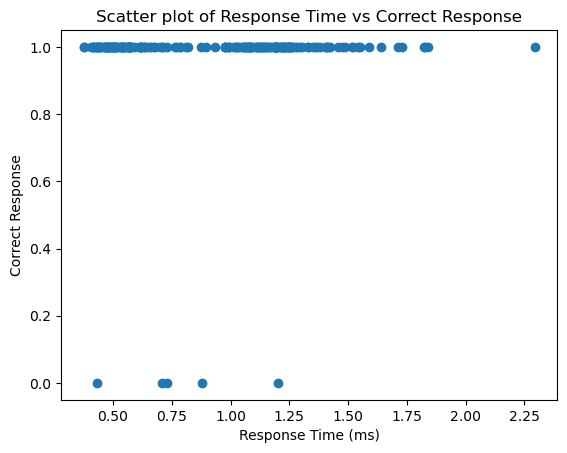

In [13]:
# general performance

correct = task_struct['correct_responses'] == task_struct['resp_key']
accuracy = np.mean(correct) * 100
print(f'Overall accuracy: {accuracy:.2f}%')

rt = task_struct['response_time']
mean_rt = np.mean(rt)
print(f'Mean response time: {mean_rt:.2f} ms')

plt.scatter(rt, correct)
plt.xlabel('Response Time (ms)')
plt.ylabel('Correct Response')
plt.title('Scatter plot of Response Time vs Correct Response')
plt.show()

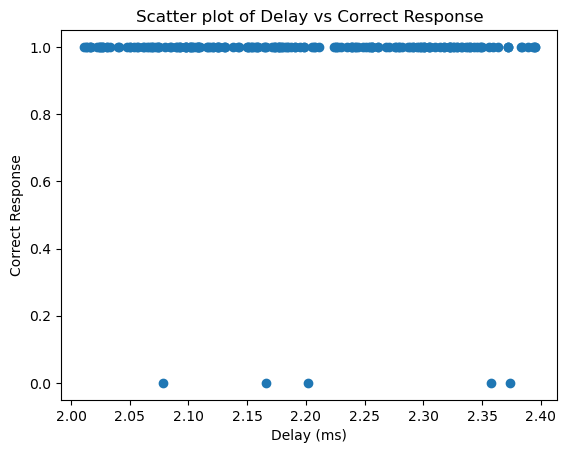

In [ ]:
# look at maintenance period duration

delay = task_struct['ISI']
correct = task_struct['correct_responses'] == task_struct['resp_key']
plt.scatter(delay, correct)
plt.xlabel('Delay (ms)')
plt.ylabel('Correct Response')
plt.title('Scatter plot of Delay vs Correct Response')
plt.show()

(array([3., 3., 0., 1., 1., 2., 0., 2., 1., 3.]),
 array([0.4213329 , 0.52165089, 0.62196888, 0.72228687, 0.82260486,
        0.92292285, 1.02324084, 1.12355883, 1.22387682, 1.32419481,
        1.4245128 ]),
 <BarContainer object of 10 artists>)

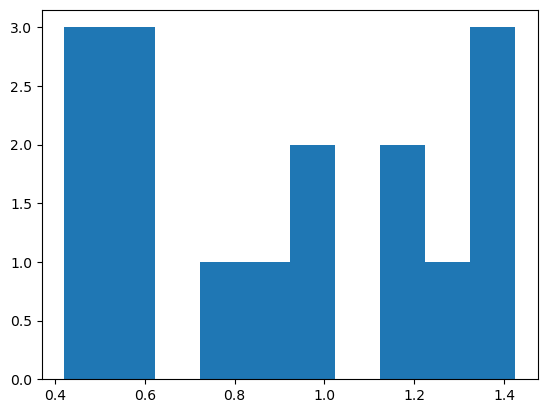

In [7]:
plt.hist(task_struct['response_time'])

In [17]:
for i in range(8):
    print(len(slider_trial_positions[i]['pos']))

168
148
171
162
118
147
137
121


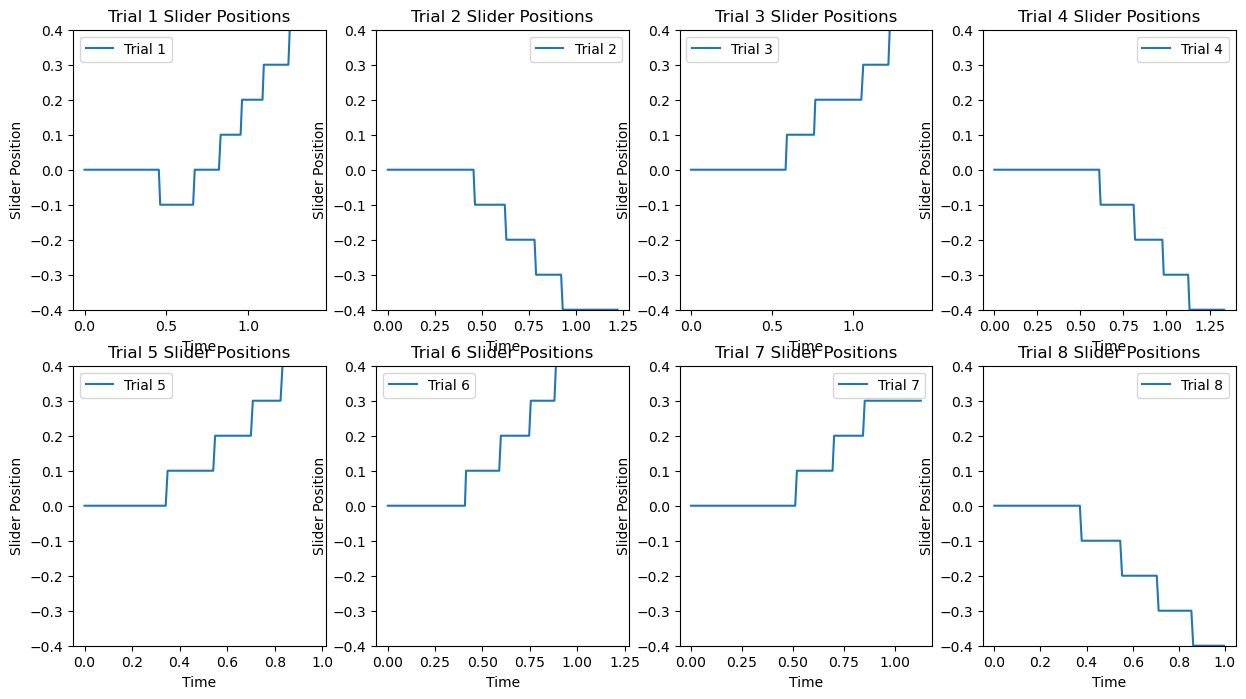

In [16]:
# plot slider positions
slider_trial_positions = [task_struct['slider_positions'][i] for i in range(len(task_struct['slider_positions'])) if not (task_struct['slider_positions'][i] is None)]

fig, axs = plt.subplots(2,4, figsize=(15,8))
axs = axs.flatten()
for i in range(min(8, len(slider_trial_positions))):
    axs[i].plot(slider_trial_positions[i]['time'], slider_trial_positions[i]['pos'], label=f'Trial {i+1}')
    axs[i].set_title(f'Trial {i+1} Slider Positions')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Slider Position')
    axs[i].set_ylim(-0.4, 0.4)
    axs[i].legend()

plt.show()

### compare cue vs retrocue

C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\3602820358.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[np.array(cue)==1], rt[np.array(cue)==2]], labels=['Cue', 'Retrocue'])


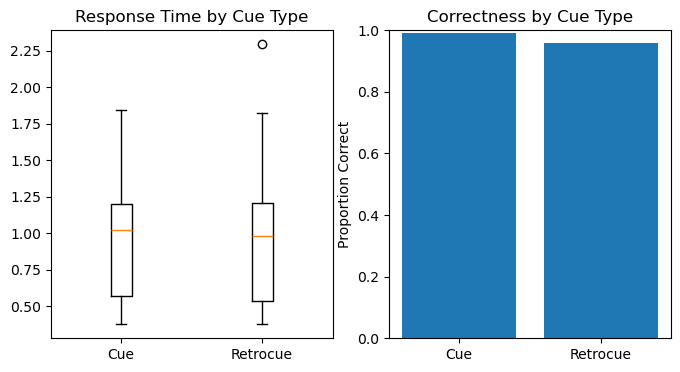

In [19]:
cue = task_struct['trial_cues'] # 2 is retrocue, 1 is cue

# boxplot of correctness and response time by cue type
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].boxplot([rt[np.array(cue)==1], rt[np.array(cue)==2]], labels=['Cue', 'Retrocue'])
axs[0].set_title('Response Time by Cue Type')

correct = task_struct['correct_responses'] == task_struct['resp_key']
axs[1].bar([0,1], [np.mean(correct[np.array(cue)==1]), np.mean(correct[np.array(cue)==2])], tick_label=['Cue', 'Retrocue'])
axs[1].set_title('Correctness by Cue Type')
axs[1].set_ylim([0,1])
axs[1].set_ylabel('Proportion Correct')
plt.show()

### compare button vs slider

C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\4043779731.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[np.array(response_type)==0], rt[np.array(response_type)==1]], labels=['Button', 'Slider'])


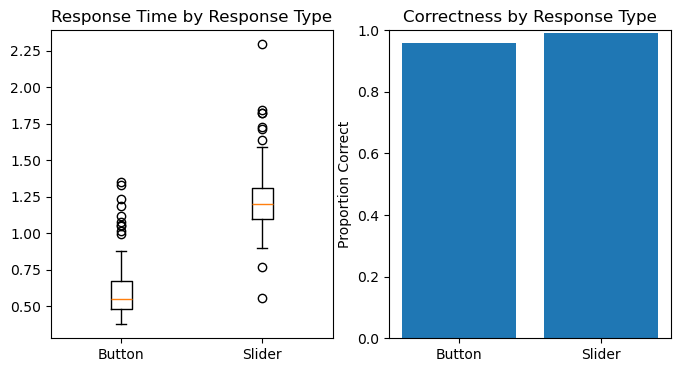

In [22]:
response_type = task_struct['response_variants'] # 0 is button, 1 is slider

# boxplot of correctness and response time by response type
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].boxplot([rt[np.array(response_type)==0], rt[np.array(response_type)==1]], labels=['Button', 'Slider'])
axs[0].set_title('Response Time by Response Type')

correct = task_struct['correct_responses'] == task_struct['resp_key']
axs[1].bar([0,1], [np.mean(correct[np.array(response_type)==0]), np.mean(correct[np.array(response_type)==1])], tick_label=['Button', 'Slider'])
axs[1].set_title('Correctness by Response Type')
axs[1].set_ylim([0,1])
axs[1].set_ylabel('Proportion Correct')
plt.show()

C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\4271699885.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[np.array(response_type)==0], rt[np.array(response_type)==1]], labels=['Button', 'Slider'])
C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\4271699885.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([rt[np.array(response_type)==0], first_slider_times[np.array(response_type)==1]], labels=['Button', 'First Slider Movement'])


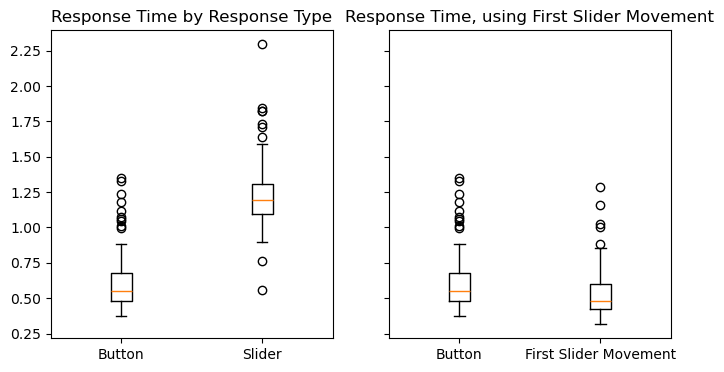

In [38]:
# compare response time by first slider movement rather than button

slider_positions = task_struct['slider_positions'] # list of dicts with 'time' and 'position' keys
first_slider_times = []
for resp_type, slider_pos in zip(response_type, slider_positions):
    if resp_type == 1 and slider_pos: # only for slider responses
        first_slider_times.append(slider_pos['time'][slider_pos['pos']!=0][0]) # first time moved from 0
    else:
        first_slider_times.append(np.nan) # not applicable
first_slider_times = np.array(first_slider_times)

### compare button vs slider
fig, axs = plt.subplots(1,2,figsize=(8,4), sharey=True)
axs[0].boxplot([rt[np.array(response_type)==0], rt[np.array(response_type)==1]], labels=['Button', 'Slider'])
axs[0].set_title('Response Time by Response Type')
axs[1].boxplot([rt[np.array(response_type)==0], first_slider_times[np.array(response_type)==1]], labels=['Button', 'First Slider Movement'])
axs[1].set_title('Response Time, using First Slider Movement')
plt.show()

### compare prompt variants

C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\4201957687.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[np.array(prompt_type)==0], rt[np.array(prompt_type)==1]], labels=['Prompt 0', 'Prompt 1'])


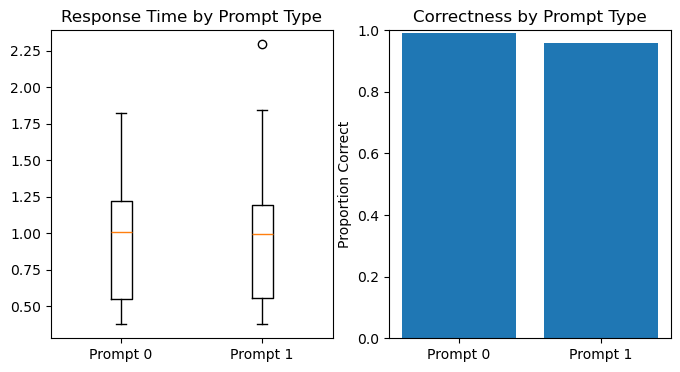

In [23]:
prompt_type = task_struct['prompt_variants'] # 0 / 1

# boxplot of correctness and response time by prompt type
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].boxplot([rt[np.array(prompt_type)==0], rt[np.array(prompt_type)==1]], labels=['Prompt 0', 'Prompt 1'])
axs[0].set_title('Response Time by Prompt Type')

correct = task_struct['correct_responses'] == task_struct['resp_key']
axs[1].bar([0,1], [np.mean(correct[np.array(prompt_type)==0]), np.mean(correct[np.array(prompt_type)==1])], tick_label=['Prompt 0', 'Prompt 1'])
axs[1].set_title('Correctness by Prompt Type')
axs[1].set_ylim([0,1])
axs[1].set_ylabel('Proportion Correct')
plt.show()

### compare categories

In [25]:
cat_axis = np.array([(cat, axis) for cat, axis in zip(task_struct['trial_categories'], task_struct['trial_axis'])])

C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\593500697.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[idxs==i]], positions=[i], labels=[cat_names[i]])
C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\593500697.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[idxs==i]], positions=[i], labels=[cat_names[i]])
C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\593500697.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([rt[idxs==i]], positions=[i], labels=[cat_names[i]])
C:\Users\nuttida-lab\AppData\Local\Temp\ipykernel_27764\593500697.p

Text(0.5, 1.0, 'Correctness by Category')

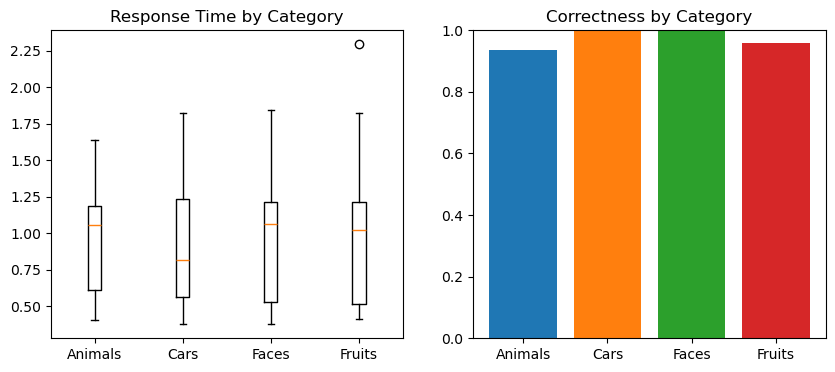

In [39]:
# first by category

categories, idxs = np.unique(cat_axis[:,0], return_inverse=True)
cat_names = data['task_struct']['category_names']
axis_names = data['task_struct']['axis_names']
fig, axs = plt.subplots(1,2,figsize=(10,4))
for i, category in enumerate(categories):
    axs[0].boxplot([rt[idxs==i]], positions=[i], labels=[cat_names[i]])
    correct = task_struct['correct_responses'] == task_struct['resp_key']
    axs[1].bar(i, np.mean(correct[idxs==i]))
axs[1].set_xticks(range(len(categories)))
axs[1].set_xticklabels([cat_names[i] for i in range(len(categories))])
axs[1].set_ylim([0,1])
axs[0].set_title('Response Time by Category')
axs[1].set_title('Correctness by Category')


In [ ]:
['trial_cues','trial_categories', 'trial_axis', 'prompt_variants', 'response_variants', 
          'trial_instructions', 'trial_stims', 'left_text', 'right_text', 'ISI', 'fixation', 'response_time',
            'correct_responses', 'resp_key', 'slider_positions']